# Exercise3: Sensors and Sensor Data

With this exercise, you will understand how to process LIDAR sensor data.

## Start robot simulation and visualization tools
### Open a remote desktop

In [1]:
%run ../utils.py
display_desktop()

### Launch Simulation in terminal

1. Launch Gazebo
    ```bash
    ros2 launch iai_office_sim turtlebot3.launch.py
    ```
<button data-commandlinker-command="terminal:create-new" class="jupyter-button">Open a Terminal</button>

## Robot control

This is a GUI tool to move the robot. to see the updates of the sensor data.
The definition of the utils functions are in [../utils.py](../utils.py)

In [2]:
rclpy.init(args=None)
velocity_publisher = VelocityPublisher()
robot_steering(velocity_publisher)

#### Robot Steering:

Box(children=(FloatSlider(value=0.0, description='Moving', max=0.5, min=-0.5, orientation='vertical', step=0.0…

## Task2: Parse Sensor data

Descriptions: Laser scan

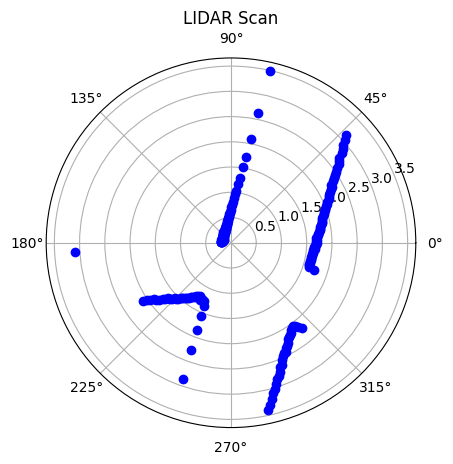

[INFO] [1725547368.860900229] [Quitting `rclpy.spin(laserscan_subscriber)`]: Done


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# fetch sensor data
def scan_callback(msg):
    
    angles = np.arange(msg.angle_min, msg.angle_max, msg.angle_increment)
    distances = np.array(msg.ranges)
    
    plt.polar(angles, distances, 'bo')
    plt.title('LIDAR Scan')
    plt.show()

    raise KeyboardInterrupt

laserscan_subscriber = LaserScanSubscriber(callback=scan_callback)

try:
    rclpy.spin(laserscan_subscriber)
except KeyboardInterrupt:
    rclpy.logging.get_logger("Quitting `rclpy.spin(laserscan_subscriber)`").info('Done')

laserscan_subscriber.subscription.destroy()
laserscan_subscriber.destroy_node()

### Todos:
- [ ] IAI office map
- [ ] SLAM
- [ ] Naviation
- [ ] ...